In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("Data/train.csv")
dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


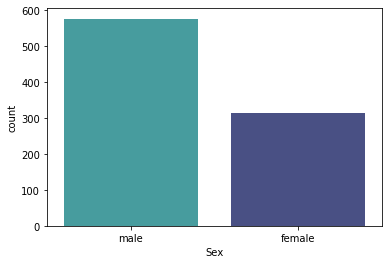

In [3]:
sns.countplot(data=dataset, palette="mako_r", x="Sex")
plt.show()

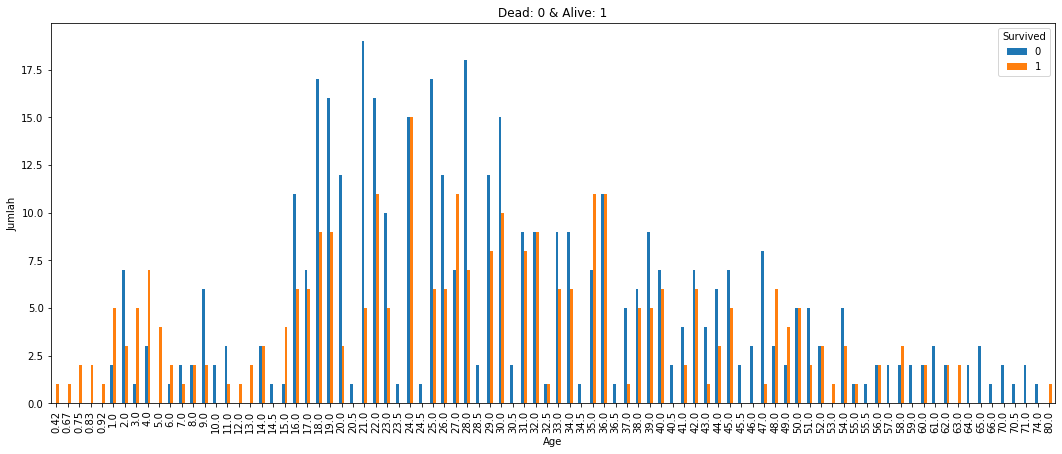

In [4]:
pd.crosstab(dataset.Age, dataset.Survived).plot(kind="bar", figsize=(18,7))
plt.ylabel("Jumlah")
plt.title("Dead: 0 & Alive: 1")
plt.show()

Text(0.5, 0, 'Kelas Penumpang')

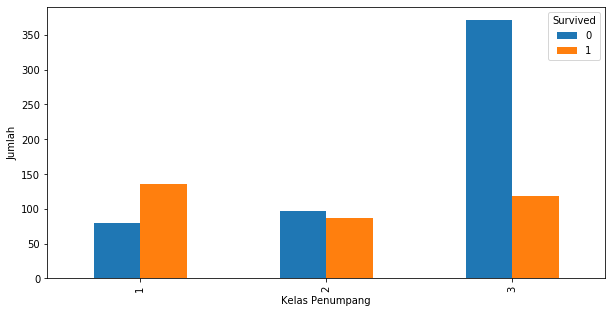

In [5]:
pd.crosstab(dataset.Pclass, dataset.Survived).plot(kind="bar", figsize=(10,5))
plt.ylabel("Jumlah")
plt.xlabel("Kelas Penumpang")

In [6]:
dataset.drop(columns=["Cabin", "Ticket", "PassengerId"], inplace=True)

In [7]:
title = []
title_group = ["Mr", "Miss", "Mrs", "Master"]
title_fix = []

for i in dataset.Name:
    title.append(i)
    
for j in title:
    splitting = j.split(",")[1].split(".")[0].lstrip()
    if splitting in title_group:
        title_fix.append(splitting)
    else:
        title_fix.append("Others")
        
        

In [8]:
title_fix[:10]

['Mr', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Master', 'Mrs', 'Mrs']

In [9]:
dataset["Title"] = title_fix

In [10]:
dataset['Title'] = dataset['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Others": 5})

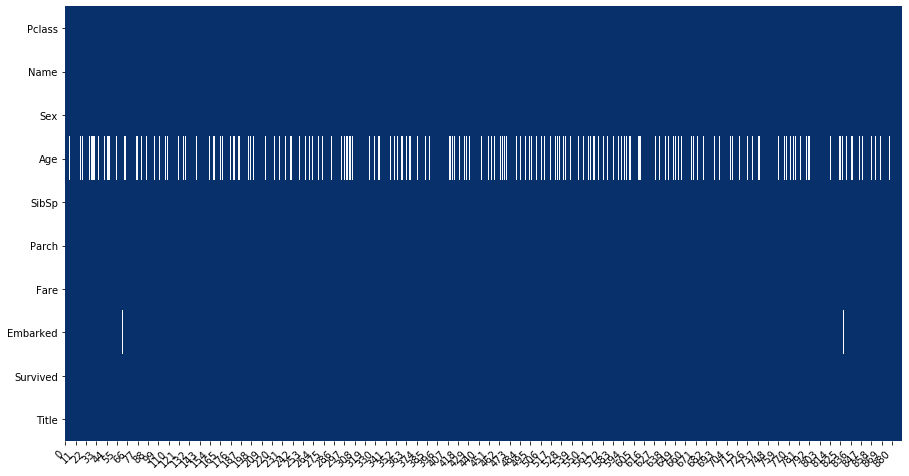

In [11]:
from jcopml.plot import plot_missing_value

plot_missing_value(dataset)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Survived    891 non-null int64
Title       891 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [13]:
dataset.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
Title         0
dtype: int64

In [14]:
dataset[["Pclass","Fare"]].groupby(["Pclass"],as_index=False).mean()

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


In [15]:
dataset.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
kelas = []

for i in dataset.Fare:
    if i <= 7.91:
        kelas.append(4)
    elif i > 7.91 and i <= 14.454:
        kelas.append(3)
    elif i > 14.454 and i <= 31:
        kelas.append(2)
    else:
        kelas.append(1)

        
dataset.Fare = kelas

In [17]:
dataset

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,4,S,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,1,C,1,3
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,3,S,1,2
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,1,S,1,3
4,3,"Allen, Mr. William Henry",male,35.0,0,0,3,S,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,3,S,0,5
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,2,S,1,2
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,2,S,0,2
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,2,C,1,1


In [18]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values="NaN", strategy="mean", axis=0)

dataset.iloc[:, 3:4] = imputer.fit_transform(dataset.iloc[:, 3:4])

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [19]:
age = []

for i in dataset.Age:
    if i <= 16:
        age.append(0)
    elif i > 16 and i <= 32:
        age.append(1)
    elif i > 32 and i <= 48:
        age.append(2)
    elif i > 48 and i <= 64:
        age.append(3)
    else:
        age.append(4)

        
dataset.Age = age

In [20]:
dataset.Sex = dataset.Sex.map({"male":1, "female":0})

In [21]:
dataset

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title
0,3,"Braund, Mr. Owen Harris",1,1,1,0,4,S,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,C,1,3
2,3,"Heikkinen, Miss. Laina",0,1,0,0,3,S,1,2
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,1,S,1,3
4,3,"Allen, Mr. William Henry",1,2,0,0,3,S,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",1,1,0,0,3,S,0,5
887,1,"Graham, Miss. Margaret Edith",0,1,0,0,2,S,1,2
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,1,2,2,S,0,2
889,1,"Behr, Mr. Karl Howell",1,1,0,0,2,C,1,1


In [22]:
dataset.Embarked = dataset.Embarked.map({'S':0, 'C':1, 'Q':2})

In [23]:
# semua data yang bernilai 0  di kolom sibSp(jml saudara) dan Parch(jml keluarga) akan bernilai False dan True dan di konvert menjadi numerical 
# dan dimasukan ke dalam kolom baru bernama Alone
dataset["Alone"] = (dataset.SibSp == 0) & (dataset.Parch == 0)
dataset.Alone = dataset.Alone.astype(int)

In [24]:
dataset.drop(columns=["Name", "SibSp", "Parch"], inplace=True)

In [25]:
dataset.dropna(subset=["Embarked"],inplace=True)

In [26]:
dataset.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Survived    0
Title       0
Alone       0
dtype: int64

In [27]:
dataset

,Pclass,Sex,Age,Fare,Embarked,Survived,Title,Alone
0,3,1,1,4,0.0,0,1,0
1,1,0,2,1,1.0,1,3,0
2,3,0,1,3,0.0,1,2,1
3,1,0,2,1,0.0,1,3,0
4,3,1,2,3,0.0,0,1,1
...,...,...,...,...,...,...,...,...
886,2,1,1,3,0.0,0,5,1
887,1,0,1,2,0.0,1,2,1
888,3,0,1,2,0.0,0,2,0
889,1,1,1,2,1.0,1,1,1


In [28]:
dataset.to_csv("Data/titanicrdyproses.csv", index=False)

In [29]:
# features = ["Pclass", "Sex", "SibSp", "Parch"]
# X = dataset[features]
X = dataset.drop(columns=["Survived"], axis=1)
y = dataset.Survived

In [30]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(X, y)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [33]:
from sklearn.svm import SVC
svm = SVC(C=1.5, gamma=0.1, kernel="rbf")
svm.fit(X, y)

SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
from sklearn.model_selection import GridSearchCV

parameter = {
    "C": [0.1,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8],
    "kernel": ["linear","rbf"],
    "gamma": [0.1,0.8,0.9,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8]
}

grid_svc = GridSearchCV(svm, param_grid=parameter, scoring="accuracy", cv=10)

In [35]:
grid_svc.fit(X, y)
grid_svc.best_params_

{'C': 1.5, 'gamma': 0.1, 'kernel': 'rbf'}

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X, y)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
# already saved
from jcopml.utils import save_model

save_model(svm, "Titanic_model_PAC.h5")
save_model(svm, "Titanic_model_KNN.h5")
save_model(svm, "Titanic_model_SVM.h5")
save_model(svm, "Titanic_model_LR.h5")
save_model(svm, "Titanic_model_RF.h5")
save_model(svm, "Titanic_model_DT.h5")

Model is pickled as model/Titanic_model_PAC.h5
Model is pickled as model/Titanic_model_KNN.h5
Model is pickled as model/Titanic_model_SVM.h5
Model is pickled as model/Titanic_model_LR.h5
Model is pickled as model/Titanic_model_RF.h5
Model is pickled as model/Titanic_model_DT.h5
